In [1]:
# Import necessary libraries
import pandas as pd

# Load the dataset
data_path = "../data/telco_customer_churn.csv"
df = pd.read_csv(data_path)

# Preview the dataset
print("Dataset Overview:")
print(df.info())  # Check columns, data types, and non-null counts
print("\nSample Data:")
print(df.head())  # Display first 5 rows

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")


Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 n

In [2]:
# Count the number of churn vs. non-churn customers
churn_counts = df['Churn'].value_counts()
print("Churn Distribution:")
print(churn_counts)


Churn Distribution:
Churn
No     5174
Yes    1869
Name: count, dtype: int64


C:\Users\pcsal\AppData\Local\Temp\ipykernel_24976\2719755511.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Churn', palette='viridis')


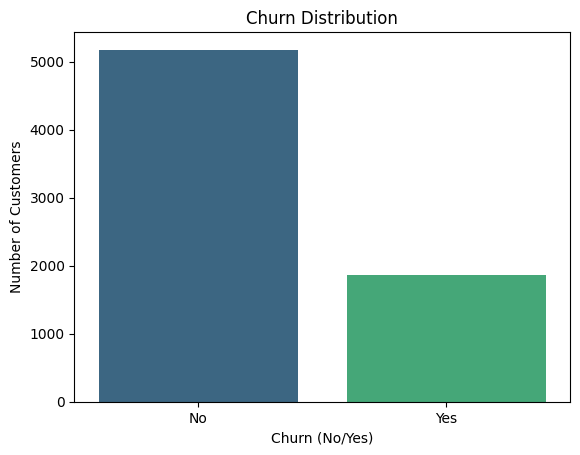

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot for churn distribution
sns.countplot(data=df, x='Churn', palette='viridis')
plt.title("Churn Distribution")
plt.xlabel("Churn (No/Yes)")
plt.ylabel("Number of Customers")
plt.show()


In [4]:
# Summary statistics for numerical features
print("Summary Statistics for Numerical Features:")
print(df[['tenure', 'MonthlyCharges', 'TotalCharges']].describe())


Summary Statistics for Numerical Features:
            tenure  MonthlyCharges
count  7043.000000     7043.000000
mean     32.371149       64.761692
std      24.559481       30.090047
min       0.000000       18.250000
25%       9.000000       35.500000
50%      29.000000       70.350000
75%      55.000000       89.850000
max      72.000000      118.750000


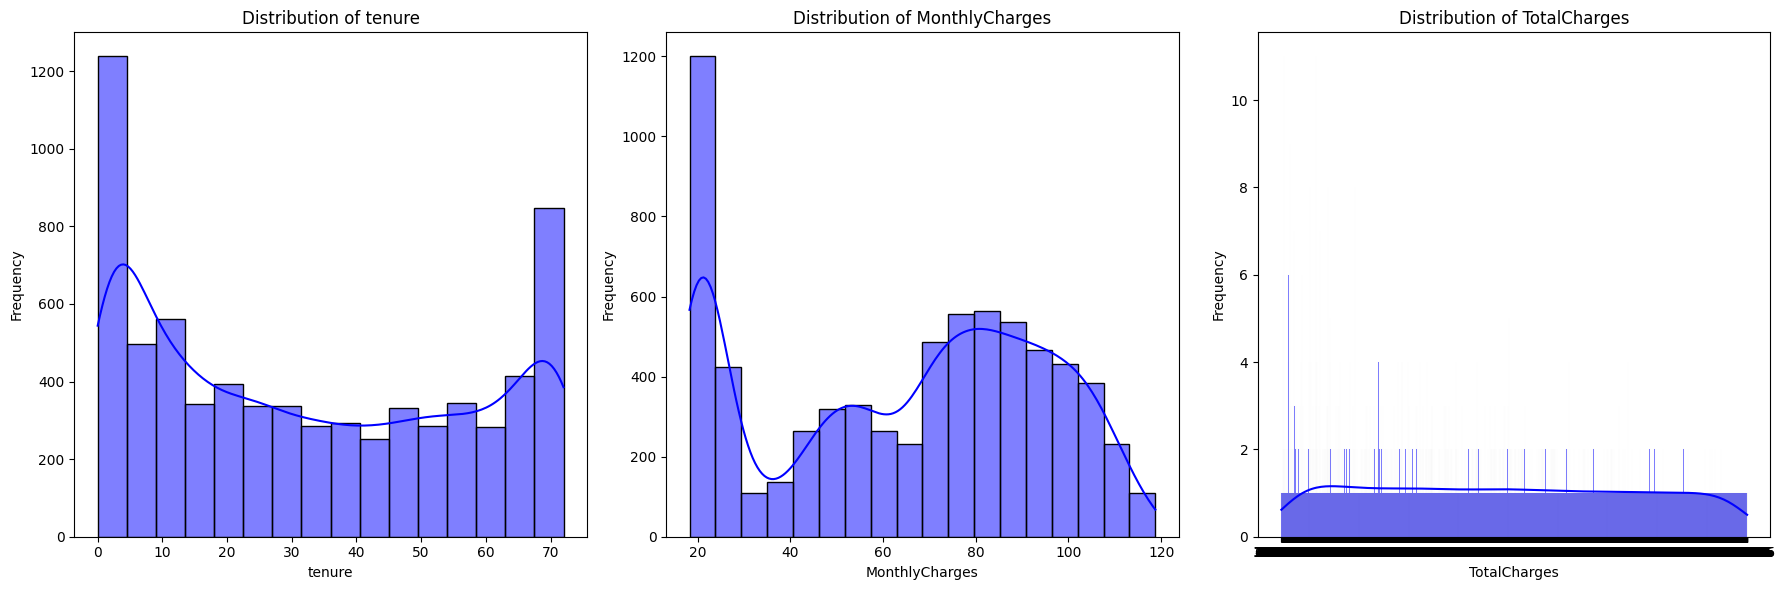

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical features to analyze
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Set up the figure and axes
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))  # Adjust columns based on features

# Loop through each feature and create a histogram
for i, feature in enumerate(numerical_features):
    sns.histplot(data=df, x=feature, kde=True, color='blue', ax=axes[i])
    axes[i].set_title(f"Distribution of {feature}")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Frequency")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()



C:\Users\pcsal\AppData\Local\Temp\ipykernel_24976\950900490.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y=feature, palette='Set2', ax=axes[i])
C:\Users\pcsal\AppData\Local\Temp\ipykernel_24976\950900490.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y=feature, palette='Set2', ax=axes[i])
C:\Users\pcsal\AppData\Local\Temp\ipykernel_24976\950900490.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y=feature, palette='Set2', ax=axes[i])


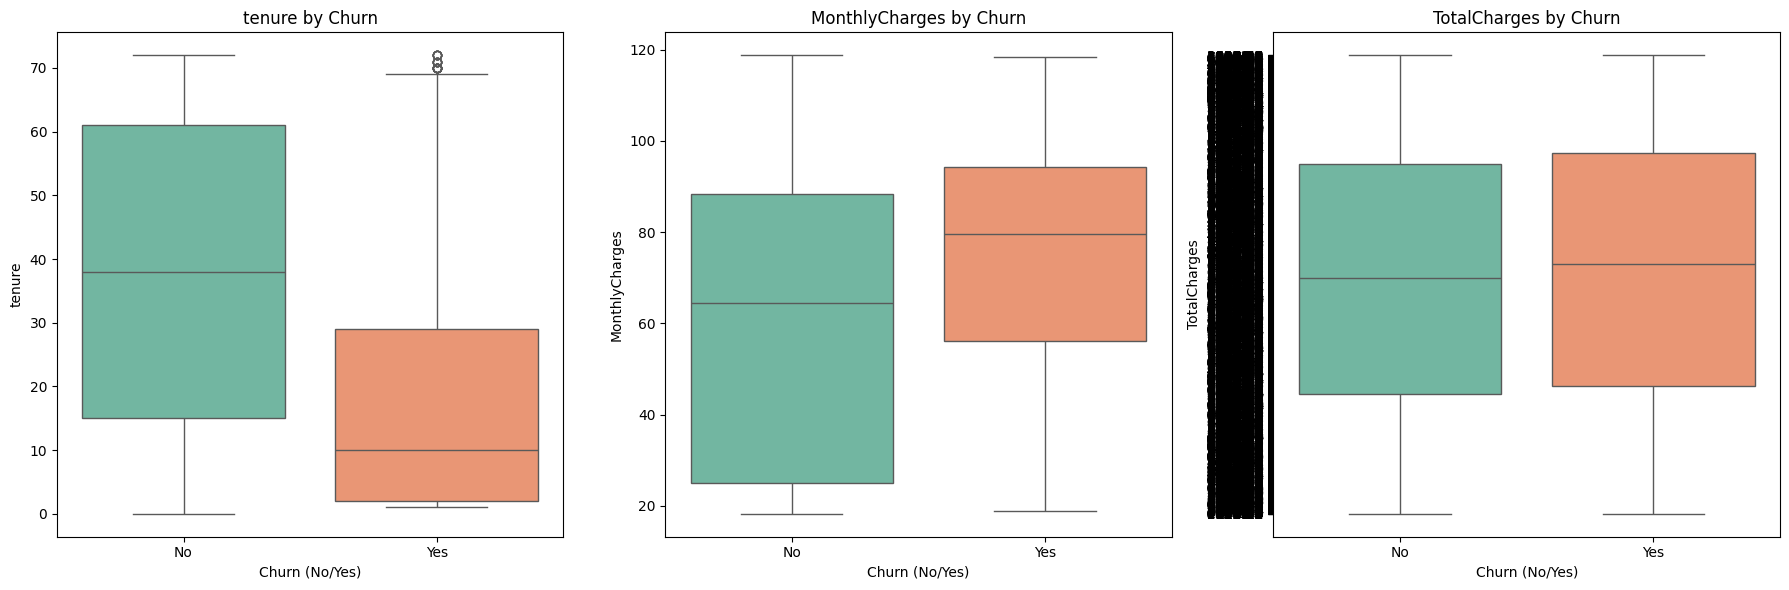

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical features to analyze
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Set up the figure and axes
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))  # Adjust number of columns based on number of features

# Loop through each feature and create a boxplot
for i, feature in enumerate(numerical_features):
    sns.boxplot(data=df, x='Churn', y=feature, palette='Set2', ax=axes[i])
    axes[i].set_title(f"{feature} by Churn")
    axes[i].set_xlabel("Churn (No/Yes)")
    axes[i].set_ylabel(feature)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


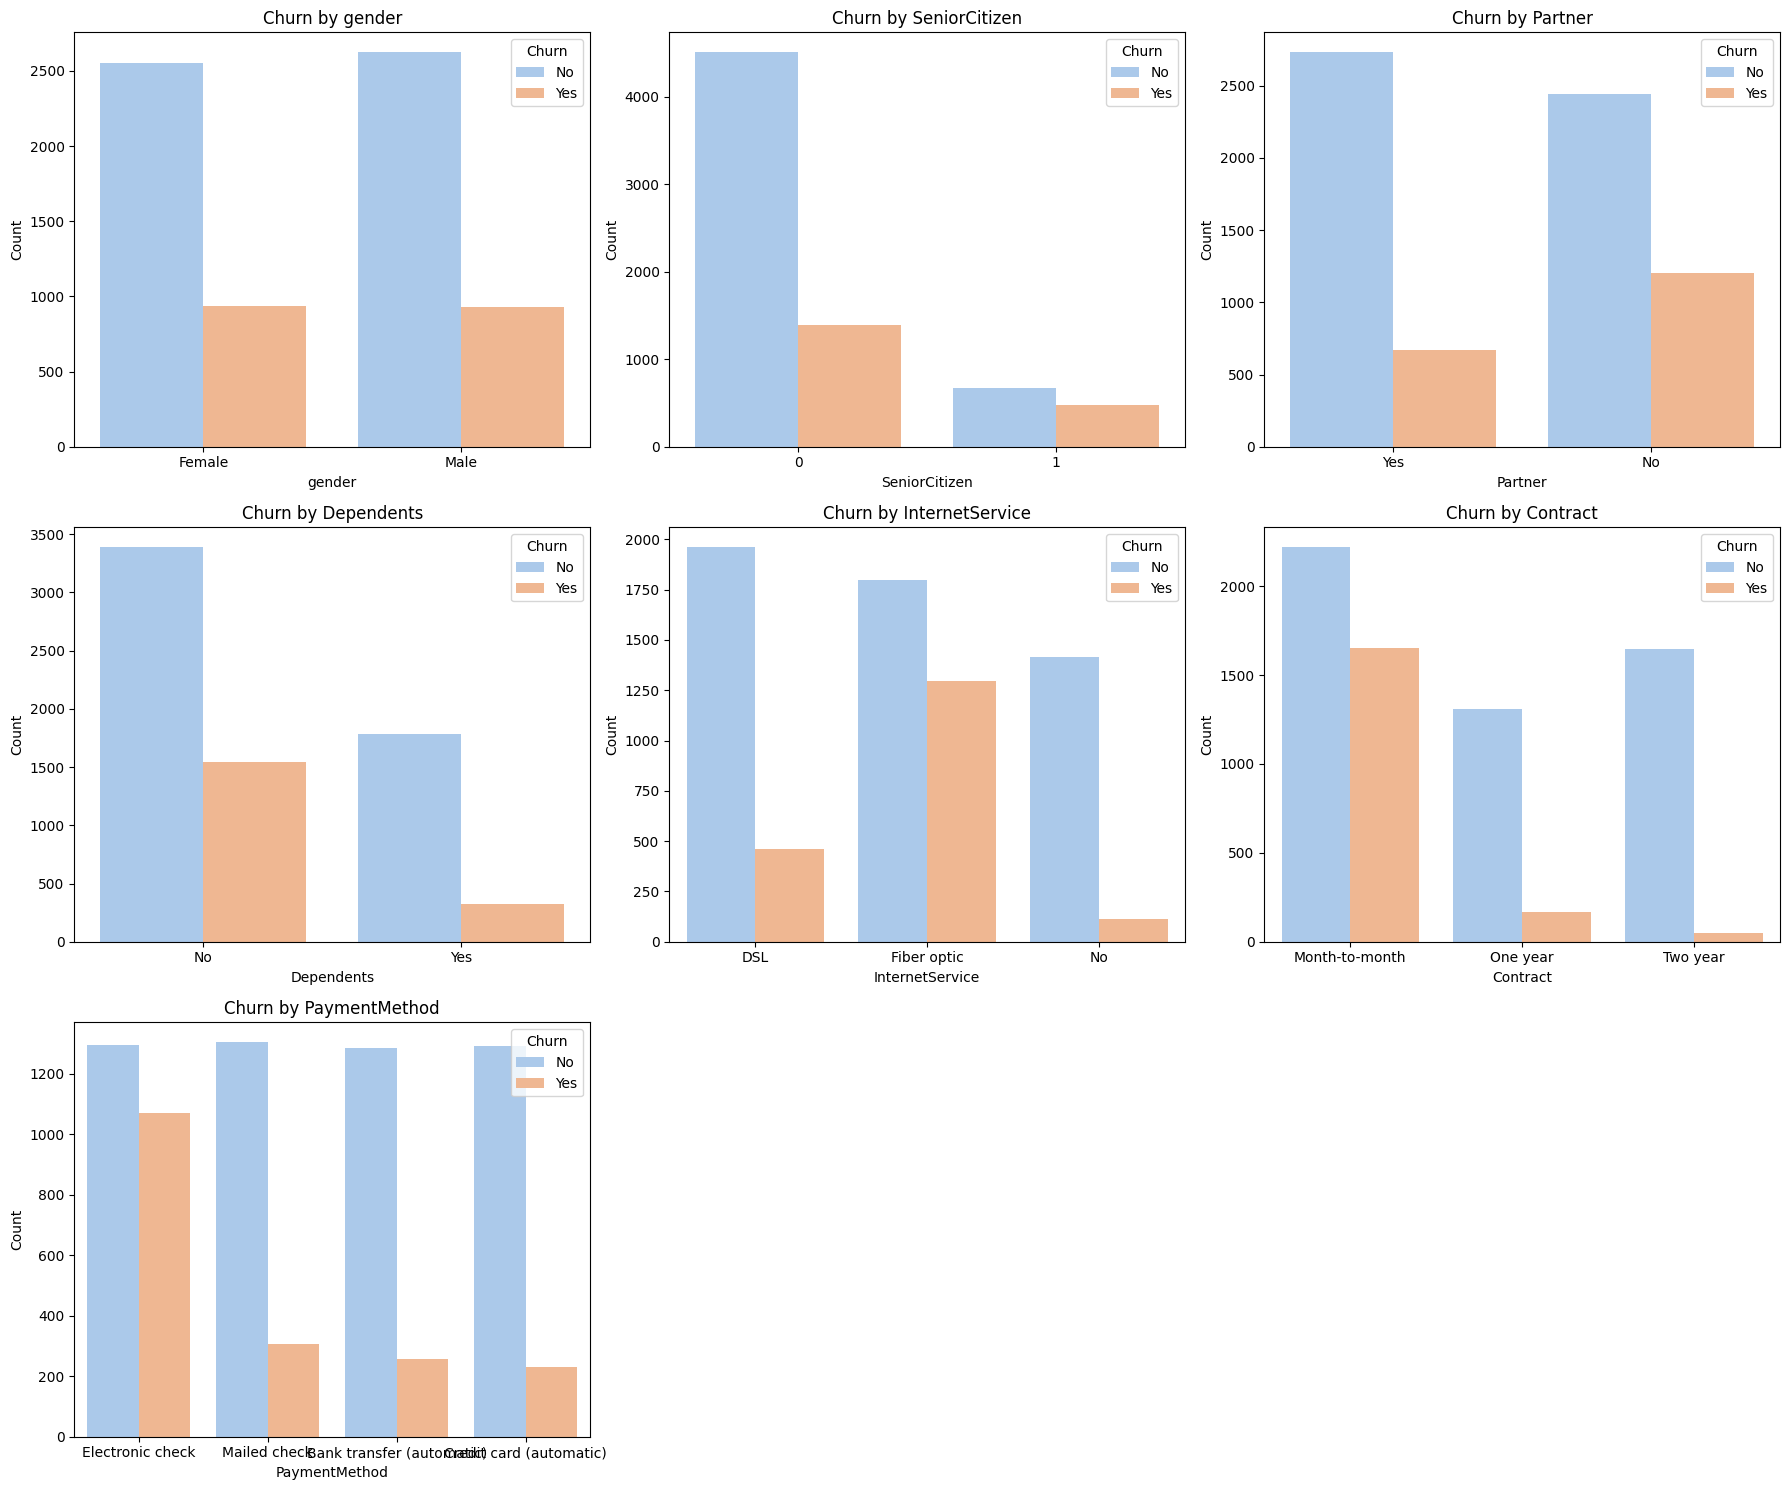

In [7]:
# List of categorical features to analyze
import matplotlib.pyplot as plt
import seaborn as sns

# List of categorical features to analyze
categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
                        'InternetService', 'Contract', 'PaymentMethod']

# Set up the figure and axes
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 15))  # Adjust rows and columns based on the number of features
axes = axes.flatten()  # Flatten the grid to iterate easily

# Loop through each feature and create a countplot
for i, feature in enumerate(categorical_features):
    sns.countplot(data=df, x=feature, hue='Churn', palette='pastel', ax=axes[i])
    axes[i].set_title(f"Churn by {feature}")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Count")
    axes[i].legend(title="Churn")

# Remove empty subplots if any
for i in range(len(categorical_features), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


In [8]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values per Column:")
print(missing_values)


Missing Values per Column:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [9]:
df = df.drop('customerID', axis=1)


# Binary encoding for categorical Data


In [10]:
binary_features = ['gender', 'Partner', 'Dependents', 'PaperlessBilling', 'Churn']
for col in binary_features:
    df[col] = df[col].map({'Yes': 1, 'No': 0, 'Female': 1, 'Male': 0})


One hot encoding for columns like PaymentMethod, InternetService, Contract

In [11]:
df1 = pd.get_dummies(df, columns=['PaymentMethod', 'InternetService', 'Contract'], drop_first=True)

After One hot encoding

In [12]:
print(df1)

      gender  SeniorCitizen  Partner  Dependents  tenure PhoneService  \
0          1              0        1           0       1           No   
1          0              0        0           0      34          Yes   
2          0              0        0           0       2          Yes   
3          0              0        0           0      45           No   
4          1              0        0           0       2          Yes   
...      ...            ...      ...         ...     ...          ...   
7038       0              0        1           1      24          Yes   
7039       1              0        1           1      72          Yes   
7040       1              0        1           1      11           No   
7041       0              1        1           0       4          Yes   
7042       0              0        0           0      66          Yes   

         MultipleLines OnlineSecurity OnlineBackup DeviceProtection  ...  \
0     No phone service             No          

In [13]:
# Convert all boolean columns to 0/1
df1 = df1.applymap(lambda x: int(x) if isinstance(x, bool) else x)

print("After Conversion to Binary:")
print(df1.head())


After Conversion to Binary:
   gender  SeniorCitizen  Partner  Dependents  tenure PhoneService  \
0       1              0        1           0       1           No   
1       0              0        0           0      34          Yes   
2       0              0        0           0       2          Yes   
3       0              0        0           0      45           No   
4       1              0        0           0       2          Yes   

      MultipleLines OnlineSecurity OnlineBackup DeviceProtection  ...  \
0  No phone service             No          Yes               No  ...   
1                No            Yes           No              Yes  ...   
2                No            Yes          Yes               No  ...   
3  No phone service            Yes           No              Yes  ...   
4                No             No           No               No  ...   

  MonthlyCharges TotalCharges Churn  PaymentMethod_Credit card (automatic)  \
0          29.85        29.85     

C:\Users\pcsal\AppData\Local\Temp\ipykernel_24976\52527318.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df1 = df1.applymap(lambda x: int(x) if isinstance(x, bool) else x)


In [16]:
print(df1.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   int64  
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   object 
 6   MultipleLines                          7043 non-null   object 
 7   OnlineSecurity                         7043 non-null   object 
 8   OnlineBackup                           7043 non-null   object 
 9   DeviceProtection                       7043 non-null   object 
 10  TechSupport                            7043 non-null   object 
 11  Stre

Converting Total Charges for Numeric 

In [17]:
df1['TotalCharges'] = pd.to_numeric(df1['TotalCharges'],errors='coerce') 
df1['TotalCharges'] = df1['TotalCharges'].fillna(df1['TotalCharges'].median())


In [18]:
binary_columns = ['PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 
                  'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for col in binary_columns:
    df1[col] = df1[col].map({'Yes': 1, 'No': 0, 'No phone service': 0})  # Convert Yes/No to 1/0


In [19]:
print(df1.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   int64  
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int64  
 6   MultipleLines                          7043 non-null   int64  
 7   OnlineSecurity                         5517 non-null   float64
 8   OnlineBackup                           5517 non-null   float64
 9   DeviceProtection                       5517 non-null   float64
 10  TechSupport                            5517 non-null   float64
 11  Stre

In [20]:
# List of columns with missing values
missing_columns = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Fill missing values with 0 (No Service)
df1[missing_columns] = df1[missing_columns].fillna(0)


In [21]:
print(df1.isnull().sum())  # Check if any column still has missing values


gender                                   0
SeniorCitizen                            0
Partner                                  0
Dependents                               0
tenure                                   0
PhoneService                             0
MultipleLines                            0
OnlineSecurity                           0
OnlineBackup                             0
DeviceProtection                         0
TechSupport                              0
StreamingTV                              0
StreamingMovies                          0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check           0
PaymentMethod_Mailed check               0
InternetService_Fiber optic              0
InternetService_No                       0
Contract_One year                        0
Contract_Tw

In [22]:
df1.to_csv('final_processed_data.csv', index=False)


Implemnting the Split

In [26]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (Y)

X = df1.drop(columns=["Churn"]) # Removing the target column'

y = df1['Churn'] # Target Variable

# Split the dataset into 80% training and 20% testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

# Check shape of the data
print(f"Training Set Shape: {X_train.shape}")
print(f"Testing Set Shape: {X_test.shape}")

Training Set Shape: (5634, 23)
Testing Set Shape: (1409, 23)


SMOTE does balance the data but it does synthetic generation which is not good for the natural dataset

In [27]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Class Distribution After SMOTE:")
print(y_train_resampled.value_counts())  # Should be ~50% Yes, 50% No


Class Distribution After SMOTE:
Churn
0    4139
1    4139
Name: count, dtype: int64


In [28]:
from sklearn.linear_model import LogisticRegression

# Initialize logistic regression model with balanced class weights
model_lr = LogisticRegression(class_weight='balanced', max_iter=500)

# Train model
model_lr.fit(X_train, y_train)

# Predict
y_pred_lr = model_lr.predict(X_test)

# Evaluate performance
from sklearn.metrics import classification_report
print("Logistic Regression Performance with Class Weights:")
print(classification_report(y_test, y_pred_lr))


Logistic Regression Performance with Class Weights:
              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1035
           1       0.51      0.79      0.62       374

    accuracy                           0.74      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.80      0.74      0.75      1409



d:\Job Hunt\Churn_detection\churn_env\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


You can see the logistic regression performance is not good. We need to improve

For that we are going to do feature scaling

In [29]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Scale only the numerical features
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])


📌 Step 6.2: Train Logistic Regression with a Different Solver
Since lbfgs struggles with large datasets, we will use saga or newton-cg.

saga is great for handling large datasets.
newton-cg works well for class imbalance.

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Train Logistic Regression with a better solver and increased iterations
model_lr = LogisticRegression(class_weight='balanced', solver='saga', max_iter=2000, random_state=42)

# Train model
model_lr.fit(X_train, y_train)

# Predict
y_pred_lr = model_lr.predict(X_test)

# Evaluate performance
print("Improved Logistic Regression Performance:")
print(classification_report(y_test, y_pred_lr))


Improved Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1035
           1       0.51      0.78      0.61       374

    accuracy                           0.74      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.80      0.74      0.75      1409



In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize Random Forest with class weights to handle imbalance
rf_model = RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate performance
print("Random Forest Performance:")
print(classification_report(y_test, y_pred_rf))


Random Forest Performance:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.62      0.49      0.54       374

    accuracy                           0.78      1409
   macro avg       0.72      0.69      0.70      1409
weighted avg       0.77      0.78      0.77      1409



In [32]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced']
}

# Initialize Grid Search with Cross-Validation
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='f1', n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print Best Parameters
print("Best Hyperparameters:", grid_search.best_params_)

# Train the Best Model
best_rf = grid_search.best_estimator_

# Predict on test set
y_pred_best_rf = best_rf.predict(X_test)

# Evaluate Performance
print("Tuned Random Forest Performance:")
print(classification_report(y_test, y_pred_best_rf))


Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Hyperparameters: {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Tuned Random Forest Performance:
              precision    recall  f1-score   support

           0       0.90      0.77      0.83      1035
           1       0.55      0.75      0.63       374

    accuracy                           0.77      1409
   macro avg       0.72      0.76      0.73      1409
weighted avg       0.80      0.77      0.78      1409



In [37]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Define numerical features for scaling
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Define transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features)  # Only scale numerical columns
    ], remainder='passthrough'  # Keep categorical features as-is
)

# Define models with separate pipelines
models = {
    "Logistic Regression": Pipeline([
        ('scaler', preprocessor),
        ('model', LogisticRegression(class_weight='balanced', solver='saga', max_iter=2000, random_state=42))
    ]),
    "Random Forest": Pipeline([
        ('model', RandomForestClassifier(n_estimators=300, class_weight='balanced', random_state=42))
    ]),
    "XGBoost": Pipeline([
        ('model', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
    ])
}

models["XGBoost"] = Pipeline([
    ('model', XGBClassifier(eval_metric='logloss', random_state=42))
])

# Train and evaluate each model
for name, pipeline in models.items():
    print(f"🔹 Training {name}...")
    
    # Train model
    pipeline.fit(X_train, y_train)

    # Predict on test data
    y_pred = pipeline.predict(X_test)

    # Evaluate model
    print(f"Model: {name}")
    print(classification_report(y_test, y_pred))


🔹 Training Logistic Regression...
Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1035
           1       0.51      0.78      0.61       374

    accuracy                           0.74      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.80      0.74      0.75      1409

🔹 Training Random Forest...
Model: Random Forest
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.63      0.49      0.55       374

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409

🔹 Training XGBoost...


AttributeError: 'super' object has no attribute '__sklearn_tags__'